# Secure KNN

In [1020]:
import warnings #suppress warnings
warnings.filterwarnings('ignore')

# for data analysis and wrangling
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting data
from sklearn.model_selection import train_test_split

# for kNN
from sklearn.neighbors import KNeighborsClassifier

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

# for math
import math
from sympy import *

# other imports
import time


In [1021]:
# data loading
df = pd.read_table('breast-cancer-wisconsin.data', sep=',', names=["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size","Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli","Mitoses","Class"]) 
print(df.columns.values)
df.head()

['Sample_code_number' 'Clump_Thickness' 'Uniformity_of_Cell_Size'
 'Uniformity_of_Cell_Shape' 'Marginal_Adhesion'
 'Single_Epithelial_Cell_Size' 'Bare_Nuclei' 'Bland_Chromatin'
 'Normal_Nucleoli' 'Mitoses' 'Class']


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [1022]:
# check the total number of rows along with data
df.tail()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [1023]:
df["Bare_Nuclei"][df["Bare_Nuclei"]=='?']='0'
df["Bare_Nuclei"] = df["Bare_Nuclei"].astype(str).astype(int)
df=df.drop(['Sample_code_number'], axis=1)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.463519,3.640708,0.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [1024]:
def Class_value(Class): 
     if Class == 2: 
         return 1
     else: 
         return 0
  
df['Class'] = df['Class'].apply(Class_value)

df.tail()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,3,1,1,1,3,2,1,1,1,1
695,2,1,1,1,2,1,1,1,1,1
696,5,10,10,3,7,3,8,10,2,0
697,4,8,6,4,3,4,10,6,1,0
698,4,8,8,5,4,5,10,4,1,0


In [1025]:
X = np.array(df.iloc[:, :9]) 
y = np.array(df['Class'])

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# print("X_train shape: {}".format(X_train.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("X_test shape:  {}".format(X_test.shape))
# print("y_test shape:  {}".format(y_test.shape))


X shape: (699, 9)
y shape: (699,)


In [1026]:
# For fiting and evaluating the model
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)

    accuracy = model.score(X_train,y_train)

    # accuracy upto 2 decimal places
    accuracy = round(accuracy*100,2)
    print("Accuracy: ",accuracy,"%")

    # predictions on the test set
    predictions = model.predict(X_test)

    print('MAE: ',mean_absolute_error(y_test,predictions))
    print('MSE: ',mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
    print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

    return predictions

# For error analysis and perfect fit line
def error_analysis(predictions, y_values):
    f, axes = plt.subplots(1, 2,figsize=(15,5))
    # Our model predictions
    plt.scatter(y_values,predictions, label='Predicted Normalised Output')
    # Perfect predictions
    plt.plot(y_values,y_values,'r', label='Actual Normalised Output')
    plt.legend()
    value_size = len(y_values)
    errors = y_values.reshape(value_size, 1) - predictions
    sns.distplot(errors, ax=axes[0])

    # sns.despine(left=True, bottom=True)
    axes[0].set(xlabel='Error in Normalised Output', ylabel='Probability Density', title='Error Histogram')
    axes[1].set(xlabel='Actual Normalised Responce Time', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

# Results Comparision
def results_comparison(predictions, y_values):
    y_values = np.array(y_values).reshape(-1,1)
    plt.figure(figsize=(15,5))

    plt.plot(y_values[:300,:], color = 'red', label = 'Actual Normalised Output')
    plt.plot(predictions[:300], color = 'blue', label = 'Predicted Normalised Output')
    plt.legend()
    plt.xlabel('Data Point Index')
    plt.ylabel('Normalised Output')
    plt.show()


In [1027]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn_predictions = fit_and_evaluate(knn, X_train, y_train, X_test, y_test)

knn_mape = mean_absolute_percentage_error(y_test,knn_predictions)




Accuracy:  96.96 %
MAE:  0.02142857142857143
MSE:  0.02142857142857143
RMSE:  0.14638501094227999
Variance Regression Score:  0.9019883040935672
MAPE:  64337137533864.23


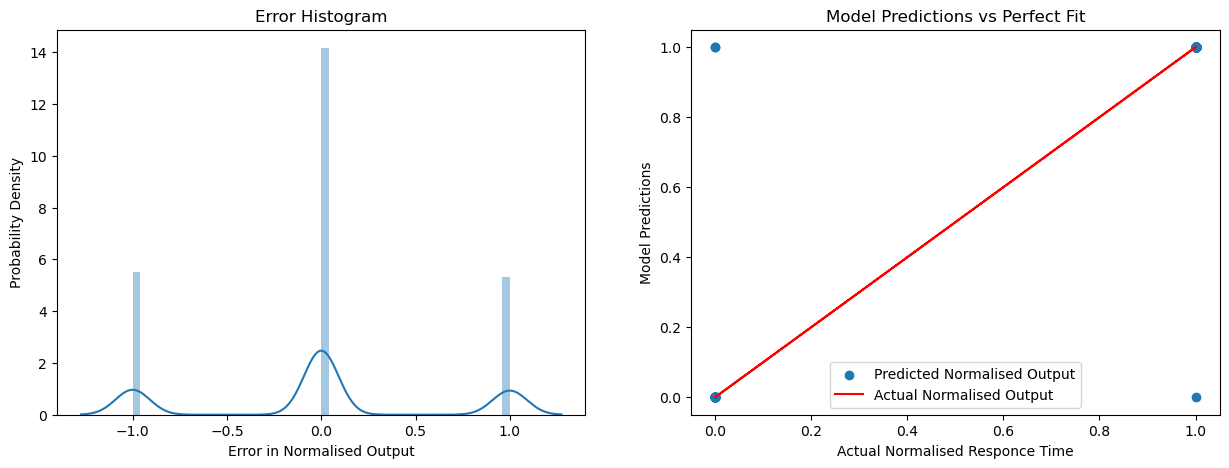

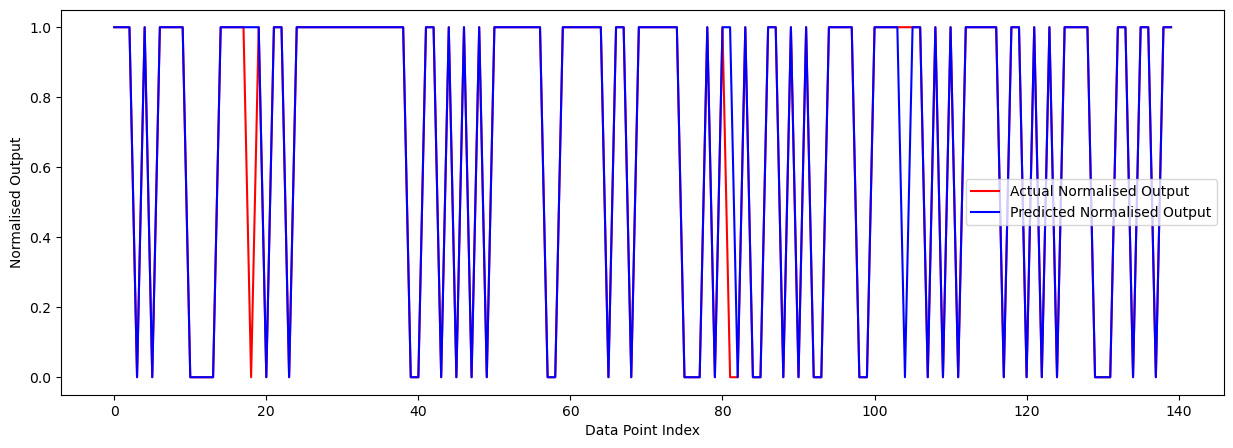

In [1028]:
error_analysis(knn_predictions, y_test)
results_comparison(knn_predictions, y_test)

# Secure KNN in cloud

In [1029]:
print(X_train.shape)
print(X_train)

np.random.seed(54)

# database = X_train.transpose()
database = X_train

print(database.shape)
print(database)

# find number of rows and coloumns in database
d = database.shape[1]
m = database.shape[0]

c = np.random.randint(1,7)
e = np.random.randint(1,10)

B_1 = np.random.randint(1,5)
B_2 = np.random.randint(1,5)

n = d + 1 + c + e

# print all parameters
print("d = ",d)
print("m = ",m)
print("c = ",c)
print("e = ",e)
print("n = ",n)


(559, 9)
[[ 6 10 10 ...  7  3  3]
 [ 5 10 10 ...  5  6  3]
 [ 7  2  4 ...  3  3  1]
 ...
 [ 6  5  4 ...  7  8  3]
 [ 5  1  1 ...  1  1  1]
 [ 4  1  1 ...  1  1  1]]
(559, 9)
[[ 6 10 10 ...  7  3  3]
 [ 5 10 10 ...  5  6  3]
 [ 7  2  4 ...  3  3  1]
 ...
 [ 6  5  4 ...  7  8  3]
 [ 5  1  1 ...  1  1  1]
 [ 4  1  1 ...  1  1  1]]
d =  9
m =  559
c =  6
e =  3
n =  19


## Key generation

In [1030]:
s_vector = np.random.randint(0, 30, (1,d + 1))
print("s_vector : ",s_vector.shape)
print(s_vector)

w_vector = np.random.randint(0, 20, (1, c))
print("w_vector : ",w_vector.shape)
print(w_vector)

M_base = np.random.randint(1, 5, (n,n))
print("M_base : ",M_base.shape)
print(M_base)

M_base_inv = np.linalg.inv(M_base)
print("M_base_inv : ",M_base_inv.shape)
print(M_base_inv)

s_vector :  (1, 10)
[[ 1  0 24  7 17  9  6  9 23  4]]
w_vector :  (1, 6)
[[13 16  6  3 18  1]]
M_base :  (19, 19)
[[3 3 1 2 4 3 1 2 4 4 1 3 4 4 1 4 3 4 2]
 [4 1 4 2 1 2 4 2 1 2 4 4 1 3 3 2 1 3 4]
 [4 2 1 2 4 3 2 2 4 1 3 2 3 1 4 2 1 3 1]
 [1 1 4 4 4 1 4 1 3 1 2 3 1 3 1 3 3 3 4]
 [4 2 3 1 4 1 2 4 4 4 1 2 3 2 4 4 1 3 2]
 [3 1 3 3 3 1 2 1 2 3 1 2 4 4 1 1 1 3 2]
 [2 3 1 3 4 3 1 4 2 1 4 4 4 3 3 3 1 2 4]
 [1 3 2 2 2 2 4 3 3 1 4 3 1 2 2 2 4 2 1]
 [1 2 1 2 4 3 3 2 4 3 4 1 3 3 3 2 1 1 2]
 [2 3 3 2 2 4 2 3 2 4 2 3 2 3 3 3 3 2 3]
 [3 1 1 3 4 2 3 1 3 4 4 4 1 3 4 4 3 1 4]
 [2 2 1 1 3 4 3 4 1 4 3 3 4 3 4 3 3 2 3]
 [1 4 3 3 4 4 3 1 2 1 3 4 2 2 4 4 3 2 4]
 [4 2 4 2 2 4 4 3 1 2 2 1 2 4 3 3 4 2 3]
 [4 1 1 4 4 2 1 2 1 4 2 2 1 4 3 2 3 2 4]
 [2 3 1 1 2 4 2 3 2 2 3 1 4 1 3 2 2 2 4]
 [4 2 3 2 4 4 3 3 3 3 4 2 4 2 1 4 3 2 3]
 [4 3 2 3 3 4 3 3 2 2 4 4 2 2 1 3 2 2 3]
 [2 2 2 4 4 4 1 1 1 3 4 4 3 3 4 1 1 1 2]]
M_base_inv :  (19, 19)
[[-2.90821050e+00 -2.08859929e-02  2.92727276e+00 -2.13007469e+00
  -2.53821075e+00

## Data encryption

In [1031]:
database_dash = []
Max_norm = 0


for p in database:
    # find max eucleadian norm
    if Max_norm < np.linalg.norm(p):
        Max_norm = np.linalg.norm(p)
        
    secret_vector = s_vector[0, :d] - 2 * p
    secret_vector = np.array(secret_vector).reshape(1,d)

    one_vector = s_vector[0, d] + np.sum(p ** 2)
    one_vector = np.array(one_vector).reshape(1,1)

    z_vector = np.random.randint(1, 5, (1,e))

    p_dash = np.concatenate((secret_vector, one_vector, w_vector, z_vector),axis=1)

    p_dash = np.dot(p_dash,M_base_inv).reshape(n)
    database_dash.append(p_dash)


database_dash = np.array(database_dash)
print("database_dash : ",database_dash.shape)
print(database_dash)

    

database_dash :  (559, 19)
[[ 1.10790635e+03  1.54732391e+01 -1.15886034e+03 ... -8.24581320e+02
   4.47800318e+02  1.82567984e+03]
 [ 9.39248425e+02  2.01939098e+01 -9.94583595e+02 ... -6.90815102e+02
   3.81547761e+02  1.54862700e+03]
 [ 1.48041866e+02  3.72765112e+00 -1.59271961e+02 ... -1.06945862e+02
   5.58007145e+01  2.51990707e+02]
 ...
 [ 5.67972701e+02  1.35845062e+01 -6.00938829e+02 ... -4.14271559e+02
   2.24439854e+02  9.39417024e+02]
 [-9.85623447e+01  1.56499597e+00  9.68419380e+01 ...  7.78184720e+01
  -4.34897973e+01 -1.51363317e+02]
 [-9.76383658e+01  1.26944515e+00  9.68235162e+01 ...  7.66720626e+01
  -4.32376482e+01 -1.50101478e+02]]


## Data Decryption

In [1032]:

decrypted_database = []
for p_dash in database_dash:
    p_dash = p_dash.reshape(1,n)
    p_tilda = np.dot(p_dash,M_base)

    p_tilda = s_vector[0, :d] - p_tilda[0, :d]
    p_tilda = (p_tilda/2).round().reshape(d)   


    decrypted_database.append(p_tilda)


print("encrypted_database : ",database_dash.shape)
print(database_dash)

decrypted_database = np.array(decrypted_database)
print("decrypted_database : ",decrypted_database.shape)
print(decrypted_database)

print("Database : ",database.shape)
print(database)
    
    


encrypted_database :  (559, 19)
[[ 1.10790635e+03  1.54732391e+01 -1.15886034e+03 ... -8.24581320e+02
   4.47800318e+02  1.82567984e+03]
 [ 9.39248425e+02  2.01939098e+01 -9.94583595e+02 ... -6.90815102e+02
   3.81547761e+02  1.54862700e+03]
 [ 1.48041866e+02  3.72765112e+00 -1.59271961e+02 ... -1.06945862e+02
   5.58007145e+01  2.51990707e+02]
 ...
 [ 5.67972701e+02  1.35845062e+01 -6.00938829e+02 ... -4.14271559e+02
   2.24439854e+02  9.39417024e+02]
 [-9.85623447e+01  1.56499597e+00  9.68419380e+01 ...  7.78184720e+01
  -4.34897973e+01 -1.51363317e+02]
 [-9.76383658e+01  1.26944515e+00  9.68235162e+01 ...  7.66720626e+01
  -4.32376482e+01 -1.50101478e+02]]
decrypted_database :  (559, 9)
[[ 6. 10. 10. ...  7.  3.  3.]
 [ 5. 10. 10. ...  5.  6.  3.]
 [ 7.  2.  4. ...  3.  3.  1.]
 ...
 [ 6.  5.  4. ...  7.  8.  3.]
 [ 5.  1.  1. ...  1.  1.  1.]
 [ 4.  1.  1. ...  1.  1.  1.]]
Database :  (559, 9)
[[ 6 10 10 ...  7  3  3]
 [ 5 10 10 ...  5  6  3]
 [ 7  2  4 ...  3  3  1]
 ...
 [ 6  5 

## Query encryption

In [1033]:
q = X_test[0]

# create diagonal matrix of d * d dimensions which contains random real numbers
N = np.random.rand(d)

# create array of size n - d which contains ones
ones = np.ones(n - d)

# concatenate N and ones
N_dash = np.concatenate((N, ones), axis=0)
N_dash = np.diag(N_dash)

N_dash_inv = np.linalg.inv(N_dash)

print("N_dash_inv : ",N_dash_inv.shape)
print(N_dash_inv)

N = np.diag(N) * 5



q = q.reshape(1,d)

q_dot = np.dot(q,N)
q_dot = (B_1 * q_dot).reshape(d)




N_dash_inv :  (19, 19)
[[ 1.52783088  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          3.46951031  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.         13.88900951  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          2.49146788  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.03611355  0.
   0.          0.          0.          0.          0.      

In [1034]:
q_max = 0
for q in q_dot:
    if q_max < q:
        q_max = q


M_t = np.random.randint(q_max, q_max + 5, (n,n))
diagonal = np.random.randint(Max_norm, Max_norm + 10, (1,n))
np.fill_diagonal(M_t, diagonal)
print("M_t : ",M_t.shape)
print(M_t)

M_t_inv = np.linalg.inv(M_t)
print("M_t_inv : ",M_t_inv.shape)
print(M_t_inv)

M_sec = np.dot(M_t,M_base)
print("M_sec : ",M_sec.shape)
print(M_sec)

M_t :  (19, 19)
[[31 53 56 54 52 54 52 52 53 55 54 53 54 56 56 54 52 52 55]
 [55 35 56 54 52 55 53 55 55 55 54 55 55 53 53 54 52 52 56]
 [56 53 28 56 56 55 56 56 56 54 55 52 55 55 56 55 52 53 56]
 [53 55 53 36 52 56 55 52 56 54 52 52 54 53 56 53 52 52 52]
 [54 55 55 52 28 55 52 53 55 56 54 56 52 55 53 56 53 54 54]
 [55 55 53 56 55 28 55 53 55 55 52 55 53 55 56 56 52 55 53]
 [56 53 55 53 55 53 28 56 54 53 53 55 54 54 54 52 53 52 54]
 [53 54 56 55 53 54 56 31 54 56 55 55 53 55 52 55 53 54 56]
 [53 56 54 53 56 55 55 54 36 52 56 53 53 54 53 54 52 55 55]
 [55 52 55 55 54 52 55 56 55 29 52 53 54 54 53 54 56 53 53]
 [54 53 56 54 54 53 53 52 54 55 37 53 56 53 52 55 55 52 53]
 [52 54 54 54 52 56 53 55 54 52 53 37 56 53 53 54 53 55 55]
 [54 55 55 56 52 54 54 53 53 52 55 52 31 52 55 53 55 54 55]
 [56 56 54 53 56 54 52 54 53 52 55 52 52 35 52 52 53 55 54]
 [52 55 55 53 56 55 56 53 56 55 52 52 56 56 31 55 56 53 56]
 [52 54 53 53 52 56 55 53 52 54 53 52 55 54 56 34 54 56 53]
 [54 52 54 56 53 54 52 5

In [1035]:
query_vector = q_dot.reshape(1,d)
print("query_vector : ",query_vector.shape)
print(query_vector)

one_vector = np.array([1]).reshape(1,1)
print("one_vector : ",one_vector.shape)
print(one_vector)

x_vector = np.random.randint(1, 5, (1,c))
print("x_vector : ",x_vector.shape)
print(x_vector)

zero_vector = np.zeros((1,e))
print("zero_vector : ",zero_vector.shape)
print(zero_vector)

q_dash = np.concatenate((query_vector, one_vector, x_vector, zero_vector),axis=1)
print("q_dash : ",q_dash.shape)
print(q_dash)

q_dash = q_dash.reshape(n)
print("q_dash : ",q_dash.shape)
print(q_dash)

q_nn = np.diag(q_dash)
print("q_nn : ",q_nn.shape)
print(q_nn)

query_vector :  (1, 9)
[[52.36181634  5.76450225  1.43998749  8.02739628 38.6058071  16.81533423
  21.20214174 13.92020214 19.93297178]]
one_vector :  (1, 1)
[[1]]
x_vector :  (1, 6)
[[4 3 3 1 1 3]]
zero_vector :  (1, 3)
[[0. 0. 0.]]
q_dash :  (1, 19)
[[52.36181634  5.76450225  1.43998749  8.02739628 38.6058071  16.81533423
  21.20214174 13.92020214 19.93297178  1.          4.          3.
   3.          1.          1.          3.          0.          0.
   0.        ]]
q_dash :  (19,)
[52.36181634  5.76450225  1.43998749  8.02739628 38.6058071  16.81533423
 21.20214174 13.92020214 19.93297178  1.          4.          3.
  3.          1.          1.          3.          0.          0.
  0.        ]
q_nn :  (19, 19)
[[52.36181634  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          5.76450225  0.          0.          0.          

In [1036]:
# sample error matrix of n * n dimensions which contains random real numbers larger than q_max
E = np.random.rand(n,n)
E = E * q_max

# encrypted query
q_cap = B_2 * (np.dot(q_nn,M_sec) + E)
print("q_cap : ",q_cap.shape)
print(q_cap)


q_cap :  (19, 19)
[[5.60482374e+05 4.46087616e+05 4.56670363e+05 5.09693985e+05
  6.78741100e+05 6.05448794e+05 5.34145190e+05 4.94428180e+05
  4.85745779e+05 5.32861290e+05 6.12087616e+05 5.69313361e+05
  5.30963905e+05 5.67594244e+05 5.82414059e+05 5.64519781e+05
  4.70496095e+05 4.53537883e+05 6.09688239e+05]
 [6.15714793e+04 5.09088571e+04 4.93491866e+04 5.65665822e+04
  7.69234837e+04 6.79728803e+04 5.81729041e+04 5.50121047e+04
  5.57903966e+04 6.03284185e+04 6.68886357e+04 6.33367877e+04
  6.08582563e+04 6.36733535e+04 6.39038694e+04 6.37692102e+04
  5.33291392e+04 5.11039554e+04 6.67445650e+04]
 [1.54546068e+04 1.27600130e+04 1.28936064e+04 1.43898770e+04
  1.90885191e+04 1.68946420e+04 1.49507585e+04 1.38868703e+04
  1.38334226e+04 1.53446258e+04 1.69196549e+04 1.61493772e+04
  1.50286393e+04 1.63645543e+04 1.58505657e+04 1.62643483e+04
  1.35054997e+04 1.29577143e+04 1.73216164e+04]
 [8.69476085e+04 6.97012051e+04 6.83443640e+04 7.70186279e+04
  1.04137378e+05 9.36047439e+04 

In [1037]:
database_dash_dash = []

print("database_dash : ",database_dash.shape)
print(database_dash)

for p_dash in database_dash:
    p_dash = p_dash.reshape(1,n)
    p_dash_dash = np.dot(p_dash,M_t_inv).reshape(n)
    database_dash_dash.append(p_dash_dash)


database_dash_dash = np.array(database_dash_dash)


database_dash :  (559, 19)
[[ 1.10790635e+03  1.54732391e+01 -1.15886034e+03 ... -8.24581320e+02
   4.47800318e+02  1.82567984e+03]
 [ 9.39248425e+02  2.01939098e+01 -9.94583595e+02 ... -6.90815102e+02
   3.81547761e+02  1.54862700e+03]
 [ 1.48041866e+02  3.72765112e+00 -1.59271961e+02 ... -1.06945862e+02
   5.58007145e+01  2.51990707e+02]
 ...
 [ 5.67972701e+02  1.35845062e+01 -6.00938829e+02 ... -4.14271559e+02
   2.24439854e+02  9.39417024e+02]
 [-9.85623447e+01  1.56499597e+00  9.68419380e+01 ...  7.78184720e+01
  -4.34897973e+01 -1.51363317e+02]
 [-9.76383658e+01  1.26944515e+00  9.68235162e+01 ...  7.66720626e+01
  -4.32376482e+01 -1.50101478e+02]]


In [1038]:
print("q_cap : ",q_cap.shape)
print(q_cap)


q_tilda_encrypted = np.dot(q_cap,N_dash_inv)
print("q_tilda_encrypted : ",q_tilda_encrypted.shape)
print(q_tilda_encrypted)

q_cap :  (19, 19)
[[5.60482374e+05 4.46087616e+05 4.56670363e+05 5.09693985e+05
  6.78741100e+05 6.05448794e+05 5.34145190e+05 4.94428180e+05
  4.85745779e+05 5.32861290e+05 6.12087616e+05 5.69313361e+05
  5.30963905e+05 5.67594244e+05 5.82414059e+05 5.64519781e+05
  4.70496095e+05 4.53537883e+05 6.09688239e+05]
 [6.15714793e+04 5.09088571e+04 4.93491866e+04 5.65665822e+04
  7.69234837e+04 6.79728803e+04 5.81729041e+04 5.50121047e+04
  5.57903966e+04 6.03284185e+04 6.68886357e+04 6.33367877e+04
  6.08582563e+04 6.36733535e+04 6.39038694e+04 6.37692102e+04
  5.33291392e+04 5.11039554e+04 6.67445650e+04]
 [1.54546068e+04 1.27600130e+04 1.28936064e+04 1.43898770e+04
  1.90885191e+04 1.68946420e+04 1.49507585e+04 1.38868703e+04
  1.38334226e+04 1.53446258e+04 1.69196549e+04 1.61493772e+04
  1.50286393e+04 1.63645543e+04 1.58505657e+04 1.62643483e+04
  1.35054997e+04 1.29577143e+04 1.73216164e+04]
 [8.69476085e+04 6.97012051e+04 6.83443640e+04 7.70186279e+04
  1.04137378e+05 9.36047439e+04 

In [1039]:
# convert matrix q_tilda_encrypted to vector q_tilda_vector by adding all elements of cloumns in the row
q_tilda_vector = []
for i in range(n):
    q_tilda_vector.append(np.sum(q_tilda_encrypted[i,:]))

q_tilda_vector = np.array(q_tilda_vector)
print("q_tilda_vector : ",q_tilda_vector.shape)
print(q_tilda_vector)

q_tilda_vector :  (19,)
[1.91389310e+07 2.11629506e+06 5.40431337e+05 2.91837909e+06
 1.40775302e+07 6.19076212e+06 7.73994143e+06 5.14582817e+06
 7.37809259e+06 3.68722389e+05 1.47659119e+06 1.10747493e+06
 1.09461271e+06 3.66642204e+05 3.76594107e+05 1.10554362e+06
 3.05963544e+03 2.77186086e+03 3.71907898e+03]


## Secure KNN

In [1040]:
def kNNComp(database_dash_dash,q_tilda_vector,k=1):
    dist = np.dot(database_dash_dash, q_tilda_vector)
    idx = np.argpartition(dist, k)[:k]

In [1046]:

def knn(X_train, X_test, k):
    """Compute the k nearest neighbors of a point in the dataset."""
    eucledian_distance = np.linalg.norm(X_train - X_test, axis=1)
    indices = np.argpartition(eucledian_distance, k)[:k]
    return X_train[indices]

In [1047]:
indices = kNNComp(database_dash_dash,q_tilda_vector,1)

unenc_indices = knn(database, q, 1)
print(unenc_indices)

print(indices)

[[ 8 10 10 10  6 10 10 10 10]]
None
